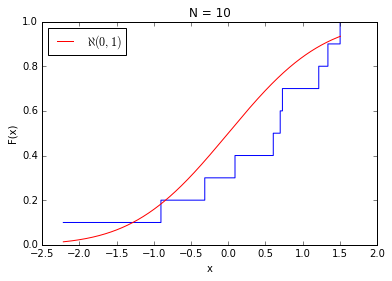

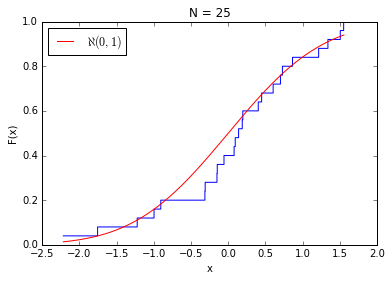

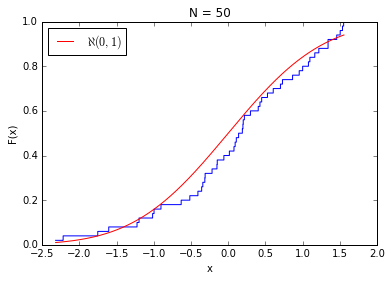

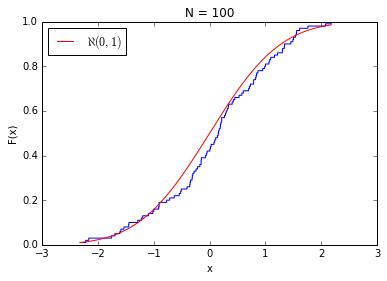

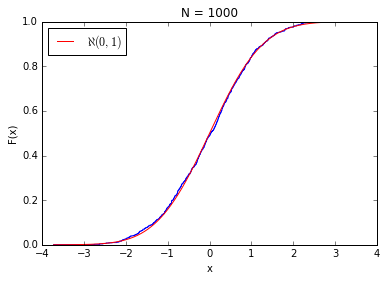

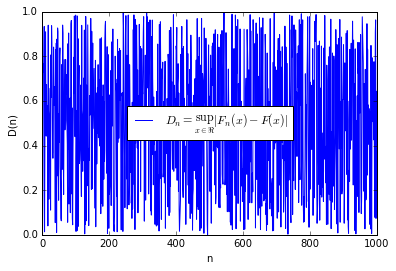

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as sps
from scipy.stats import norm
import statsmodels.api as sm
%matplotlib inline

k = 5
N = 10**3
Arr = sps.norm.rvs(size = N)
nums = [10,25,50,100,1000,10000]




def buildDistribution(arr):
    class distr(sps.rv_discrete):
        def cdf(self,v):
            sum = 0
            for i in range(len(arr)):
                if (v - arr[i]) >= 0:
                    sum += 1
                sum /= len(arr)
            return sum
    empDistr = distr(name='empirical distribution')
    return empDistr

def plotEmpiricalDistr(arr, n):
    ecdf = sm.distributions.ECDF(arr)

    x = np.linspace(min(arr), max(arr), N) 
    plt.step(x,ecdf(x) )
    plt.plot(x, sps.norm.cdf(x), 'r', label = r'$\aleph(0,1)$')
    plt.title('N = ' + str(n))
    plt.xlabel('x')
    plt.ylabel('F(x)')
    
    plt.legend(loc = 'upper left')
    plt.show()

for n in nums:
    if n <= N:
        plotEmpiricalDistr(Arr[0:n:], n)

def countD(arr):
    D = []

    for n in range(len(arr)):
        maxVal = 0
        distr_n = buildDistribution(arr)
        for x in arr[0:n:]:
            maxVal = abs(distr_n.cdf(x) - sps.norm.cdf(x))
        D += [maxVal]
    A_X = np.arange(1,len(arr) + 1,1)
    
    plt.plot(A_X, D, 'b', label = r'$D_{n} = \sup_{x \in \Re}|F_{n}(x) - F(x)|$')
    
    plt.xlabel('n')
    plt.ylabel('D(n)')
    plt.legend(loc = 'best')
    plt.show()


countD(Arr)
